# Astropy tables: columns and units

In [2]:
import numpy as np
import astropy.units as u
from astropy.table import Table, QTable
from astropy.coordinates import SkyCoord, Angle
import matplotlib.pyplot as plt

⚠️ `Tables` with units have limited functionality. For full unit management, it is recommended to use `QTable`.

In [ ]:
a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5] * u.cm
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = QTable([a, b, c, d],
           names=('id', 'length', 'label', 'velocity'),
           meta={'name': 'first table'})

In [ ]:
t

In [ ]:
t['velocity']

In [ ]:
t['velocity'][1]

In [ ]:
t['velocity'][0:2]

In [ ]:
t[2]

In [ ]:
t['velocity'].unit

## Obtaining information and statistics

In [ ]:
t.info

In [ ]:
t.info('stats')

In [ ]:
stats = t.info('stats', out=None)
stats

In [ ]:
stats[3]['mean']

## Time and coordinates

In [ ]:
from astropy.time import Time
from astropy.coordinates import SkyCoord

Time.FORMATS

In [ ]:
mjd = Time([56200.25, 56400.33, 57500.66], format='mjd', scale='utc')
date = mjd.to_datetime()
sc = SkyCoord([10, 20, 30], [-45, +40, +55], unit='deg')
tab = QTable([mjd, date,  sc, sc.to_string('hmsdms')], names=['MJD', 'Date', 'skycoord', 'coord'])
tab

In [ ]:
tab['coord']

## Managing table columns

In [ ]:
tab.columns

In [ ]:
tab.colnames

Substitute column

In [ ]:
tab['MJD'] = [50000, 60000, 70000]
tab

Create new column

In [ ]:
tab['x'] = [1,2,3]
tab['y'] = [10,20,30]
tab

In [ ]:
tab['z'] = tab['x']*2 + tab['y']
tab

Selection of relevant columns

In [ ]:
tab['x']

In [ ]:
type(tab['x'])

In [ ]:
tab['x'].data

In [ ]:
tab['x'].mean()


In [ ]:
tab[['MJD', 'x', 'z']]


In [ ]:
my_columns = ['x', 'y', 'z']
tab[my_columns]

## Load our problem data from last session

In [3]:
data0 = Table.read('../data/data0.ecsv')

### ⛏ Exercise
- Print the first 5 rows of the table with `data0[0:5]`.
- Obtain a list of columns of the table `data0`.
- Create a new table `my_table` containing only the columns Right Ascension, Declination, and the two proper motions, and the associated errors for all of them. You should obtain a table with 8 columns.
- Obtain the description (column name, format, units and description) using .info() method.
- Print the mean R.A. in degress and the median Declination in degrees.
- Print the standard deviation (`np.std`) of the R.A. in arcseconds and of the Declination in arcmin.
- Compute the minimum and maximum proper motion in right ascension in units of mas/yr
- Compute the minimum and maximum proper motion in declination in units of arcmin/day
- Create a new column `pos_error` in `my_table` with the total uncertainty in the position that accounts for the quadratic sum (`np.sqrt(()**2 + ()**2)`) of the uncertainty of the R.A. and Declination components. Express in units of deg.
- Create a new column `pm_error` in `my_table` with the total uncertainty in the position that accounts for the quadratic sum (`np.sqrt(()**2 + ()**2)`) of the uncertainty of the proper motion components in units of arcmin per minute.


In [47]:
data0[0:5]

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,mag,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,float64
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784,8.218870196400683,8.218870196400683
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691

In [48]:
data0.columns

<TableColumns names=('dist','solution_id','DESIGNATION','source_id','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','astrometric_weight_al','astrometric_pseudo_colour','astrometric_pseudo_colour_error','mean_varpi_factor_al','astrometric_matched_observations','visibility_periods_used','astrometric_sigma5d_max','frame_rotator_object_type','matched_observations','duplicated_source','phot_g_n_obs','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_flux_

In [49]:
my_columns = ['ra', 'ra_error', 'dec', 'dec_error', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error']
my_table = data0[my_columns]
my_table

ra,ra_error,dec,dec_error,pmra,pmdec,pmra_error,pmdec_error
deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr
float64,float64,float64,float64,float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,-4.033231570564601,2.915715928312259,0.49627960158587475,0.33009256613751603
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,-2.604829384017184,-2.7929356142511312,0.2143511991498884,0.1357087428026782
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437,--,--,--,--
130.0395266278045,0.4941417306409737,19.971954482920996,0.36915177444918323,-1.7453018263697153,-6.233321453722209,0.9915618973154319,0.6882409570004236
130.02147958786338,0.2557732478660761,19.965408437364445,0.17642404227037176,-3.942520628852158,-3.3645265815605776,0.5384438848822735,0.3199843213412598
130.0497621299465,0.3991352977034726,19.98377789498254,0.28844719612018865,-2.985105973480117,-3.3053980495513504,0.8928841351157153,0.5356421247455114
130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,-35.60957552754509,-11.963702152166118,0.08754513933765422,0.055136721474611516
130.04755822939757,0.05087222973848031,19.97107625044161,0.036801006459923714,-35.31181931034908,-13.595467525919654,0.10905925697574156,0.06887100894638347


In [51]:
my_table.info()

<Table length=30330>
    name     dtype    unit                           description                             class     n_bad
----------- ------- -------- ------------------------------------------------------------ ------------ -----
         ra float64      deg                                              Right ascension       Column     0
   ra_error float64      mas                            Standard error of right ascension       Column     0
        dec float64      deg                                                  Declination       Column     0
  dec_error float64      mas                                Standard error of declination       Column     0
       pmra float64 mas / yr                   Proper motion in right ascension direction MaskedColumn  4993
      pmdec float64 mas / yr                       Proper motion in declination direction MaskedColumn  4993
 pmra_error float64 mas / yr Standard error of proper motion in right ascension direction MaskedColumn  499

In [52]:
my_table['ra'].mean(), my_table['dec'].mean()

(130.01539979635677, 19.976327728346746)

In [53]:
np.std(my_table['ra'].to(u.arcsec)), np.std(my_table['dec'].to(u.arcmin))

(<Quantity 3113.52690746 arcsec>, <Quantity 34.45150128 arcmin>)

In [54]:
np.min(my_table['pmra']), np.max(my_table['pmra'])

(-193.79692954827038, 339.1337528113895)

In [55]:
np.min(my_table['pmdec'].to(u.arcmin/u.day)), np.max(my_table['pmdec'].to(u.arcmin/u.day))

(<Quantity -1.46997085e-05 arcmin / d>, <Quantity 3.13016057e-06 arcmin / d>)

In [56]:
my_table['pos_error'] = np.sqrt(my_table['ra_error']**2 + my_table['dec_error']**2).to('deg')
my_table[0:3]

ra,ra_error,dec,dec_error,pmra,pmdec,pmra_error,pmdec_error,pos_error
deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,-4.033231570564601,2.915715928312259,0.49627960158587475,0.33009256613751603,8.763008379598162e-08
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,-2.604829384017184,-2.7929356142511312,0.2143511991498884,0.1357087428026782,3.49494498864473e-08
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437,--,--,--,--,6.129007791030071e-06


In [57]:
pos_error = np.sqrt(my_table['pmra_error']**2 + my_table['pmdec_error']**2)
my_table['pos_error'] = pos_error.to(u.arcmin/u.min)
my_table[0:3]

ra,ra_error,dec,dec_error,pmra,pmdec,pmra_error,pmdec_error,pos_error
deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,arcmin / min
float64,float64,float64,float64,float64,float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,-4.033231570564601,2.915715928312259,0.49627960158587475,0.33009256613751603,1.888712499285128e-11
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,-2.604829384017184,-2.7929356142511312,0.2143511991498884,0.1357087428026782,8.039243487802314e-12
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437,--,--,--,--,0.0


### ✨ Exercise
- Compute a new column for `data0` with the absolute magnitude in the `g` filter. Call the new column `Mg` and use the formula:  
$M_{\rm V} = m + 5log_{\rm 10}p - 10$,  
where $M_{\rm V}$ is the absolute magnitude, $m$ is the apparent magnitude and $p$ is the stellar parallax in milliarcseconds.

For example:

Vega has a parallax $p$ of 0.129 arcsec, and an apparent magnitude $m_{\rm V}$ of 0.03:  
$M_{\rm V} = 0.03 + 5log_{\rm 10}129 - 10$ = 0.58

The apparent magnitude column in the table is called `phot_g_mean_mag`, and the parallax is `parallax`. The logarithm is computed as `np.log10(<relevant column>)`.

You have more details, for instance, here: https://en.wikipedia.org/wiki/Absolute_magnitude#Examples

- Print the first few rows of `data0` and make sure the new column is created.

- Verify that your solution is right with this code:  
`data0['Mg'][0] - 8.218870196400683 < 1e-5`

In [43]:
data0['Mg'] = data0['phot_g_mean_mag'] + 5*np.log10(data0['parallax']) - 10
data0[0:3]

/tmp/ipykernel_3758/346137173.py:1: RuntimeWarning: divide by zero encountered in log10
  data0['Mg'] = data0['phot_g_mean_mag'] + 5*np.log10(data0['parallax']) - 10
/tmp/ipykernel_3758/346137173.py:1: RuntimeWarning: invalid value encountered in log10
  data0['Mg'] = data0['phot_g_mean_mag'] + 5*np.log10(data0['parallax']) - 10


dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,mag,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,float64
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784,8.218870196400683,8.218870196400683
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691

In [58]:
data0['Mg'][0] - 8.218870196400683 < 1e-5

True

# Exploratory analysis. Visualization

In [59]:
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

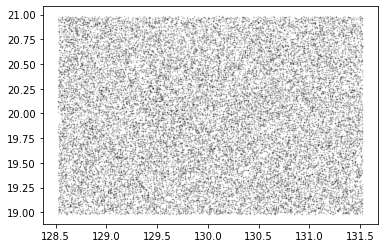

In [69]:
plt.plot(data0['ra'],     # X variable
         data0['dec'],    # Y variable
         '.',             # marker, can also be 'o', '+', '>', 's', etc..
         color='k',       # color k:black, g:green, r:red, b:blue, etc
         alpha = 0.2,     # transparency, between 0 and 1
         ms=1);           # marker size 

This is not very informative. Let's create a `figure` and `axes` with `subplots`. Let's make the image bigger and use `scatter` to be able to set a symbol size `s` proportional to the flux of the star. We will also add some axes labels.

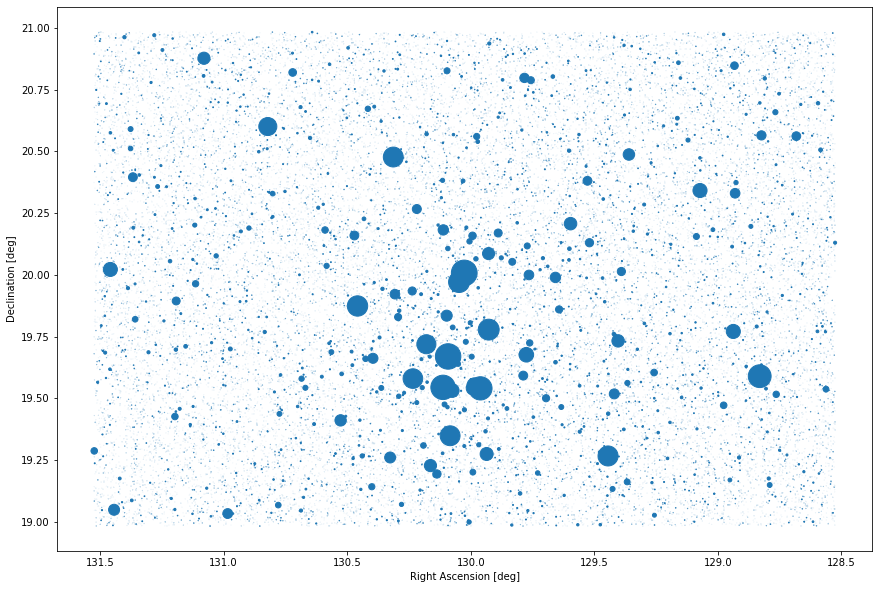

In [72]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(data0['ra'],
           data0['dec'],
           s=data0['phot_g_mean_flux']/1e5)

ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

We can plot any pair of variables. Here a quick plot without too many configuration for quick lookup.

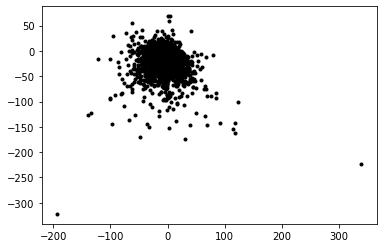

In [75]:
plt.plot(data0['pmra'], data0['pmdec'], '.k')

Also in log scale when that is relevant.

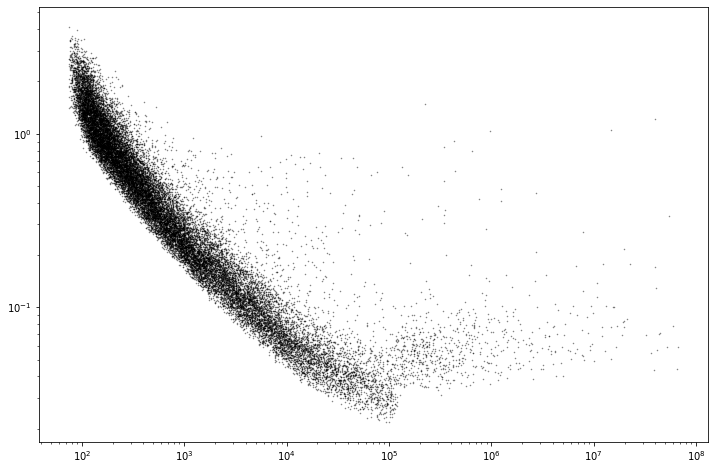

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(data0['phot_g_mean_flux'], data0['parallax_error'], '.k', ms=1, alpha=0.5)
ax.loglog();

Never forget to add labels to identify what you are plotting!

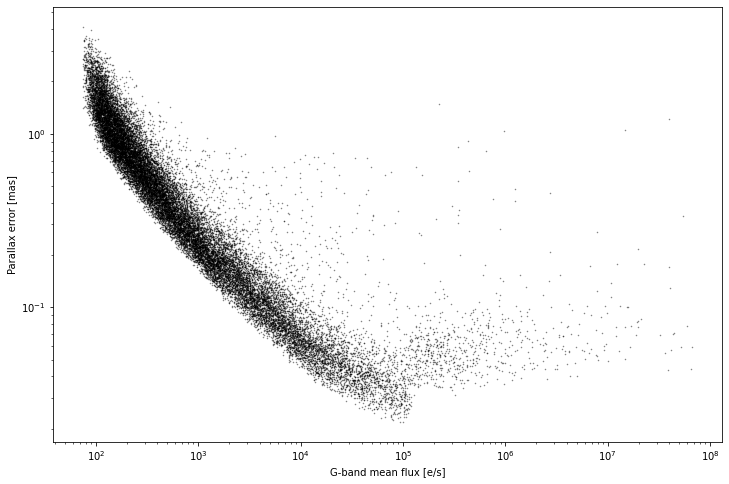

In [80]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))

ax.plot(data0['phot_g_mean_flux'], data0['parallax_error'], '.k', ms=1, alpha=0.5)
ax.loglog()

ax.set_xlabel('G-band mean flux [e/s]')
ax.set_ylabel('Parallax error [mas]');

In [87]:
def str_label(tab, col):
    return f"{tab[col].description} [{tab[col].unit}]"

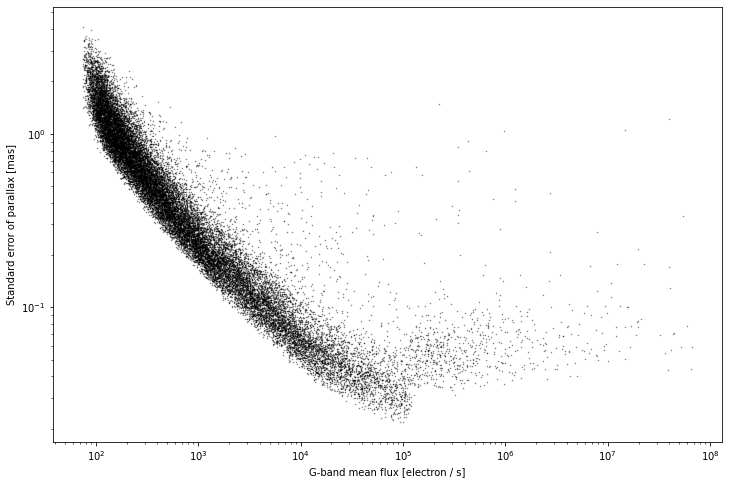

In [97]:
col1 = 'phot_g_mean_flux'
col2 = 'parallax_error'

fig, ax = plt.subplots(ncols=1, figsize=(12,8))

ax.plot(data0[col1], data0[col2], '.k', ms=1, alpha=0.5)

ax.loglog()

ax.set_xlabel(str_label(data0, col1))
ax.set_ylabel(str_label(data0, col2));

In [98]:
def plot_variables(data, col1, col2, loglog=True, **kwargs):
    fig, ax = plt.subplots(ncols=1, figsize=(12,8))

    ax.plot(data[col1], data[col2], **kwargs)
    if loglog:
        ax.loglog()
    ax.set_xlabel(str_label(data0, col1))
    ax.set_ylabel(str_label(data0, col2))

    return fig, ax

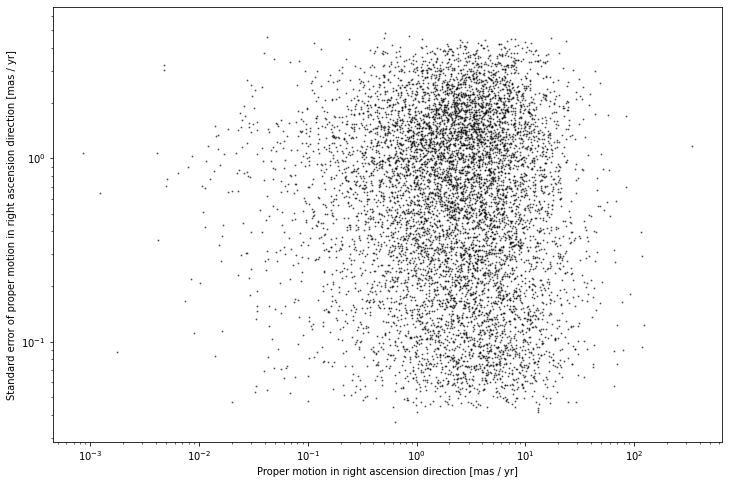

In [99]:
fig, ax = plot_variables(data0, col1='pmra', col2='pmra_error', marker='.', color='k', ms=2, alpha=0.5, ls='')

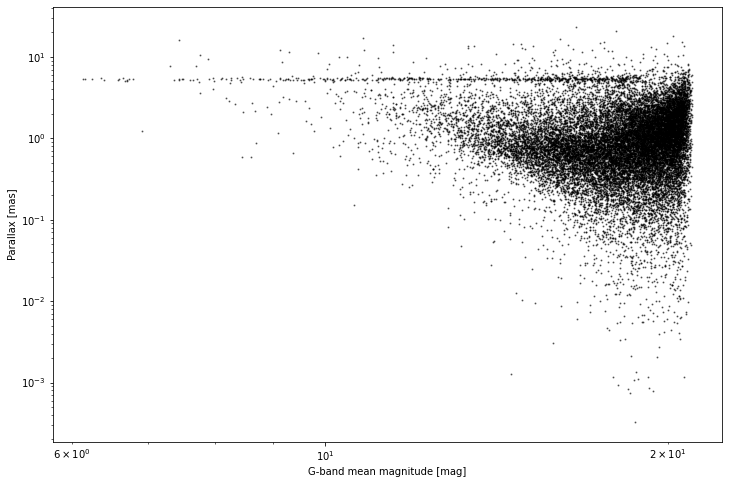

In [100]:
fig, ax = plot_variables(data0, col1='phot_g_mean_mag', col2='parallax', marker='.', color='k', ms=2, alpha=0.5, ls='')

### 🌪 Exercise
Define a fucntion similar to `plot_variables` that can be used to plot 3 columns against each other in three different subplots.

## Coordinate plots in sky projections

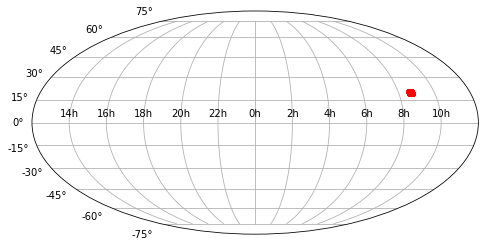

In [101]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(data0['ra'].to(u.radian), data0['dec'].to(u.radian), marker='.', color='r')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

Let's overplot the galactic plane

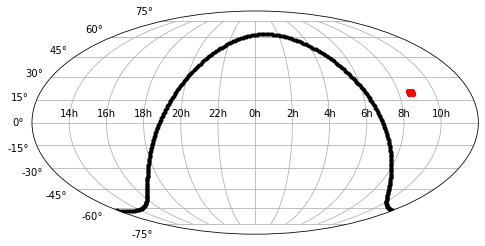

In [102]:
galactic_plane = SkyCoord(l=np.arange(-180, 180),
                          b=np.zeros(360),
                          frame='galactic', unit=u.deg)

galactic_plane_eq = galactic_plane.transform_to('icrs')
gal_ra  = galactic_plane_eq.ra.wrap_at('180d').radian
gal_dec = galactic_plane_eq.dec.radian

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(data0['ra'].to(u.radian), data0['dec'].to(u.radian), marker='.', color='r')
plt.plot(gal_ra, gal_dec, 'k.')

ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

### 🌪 Exercise
Make the previous plot but in Galactic coordinates

### 🌪 Exercise
Prepare a plot `pmra` vs `pmdec` including errorbars using the matplotlib function `plt.errorbars`. The key point is to remove NaNs from the table.

I suggest two possible ways of doing it:
- Converting the table to a pandas `DataFrame` with `Table.to_pandas`, use the pandas method `.dropna()` to eliminate NaNs, and then convert back to an astropy `Table`. Of course you will lose the unit information.
- The astropy Table columns have a method `.compressed` that converts the masked array into a normal array without the missing values. However, you also lose the unit information.

I don't know any easy way to do this in astropy `Table` and keeping the units. [This PR](https://github.com/astropy/astropy/issues/7446) was an attempt, but was never finished.

(-50.0, 50.0)

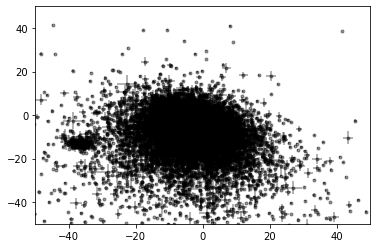

In [109]:
# Astropy doesn't seem to have an easy way to remove rows with NaNs https://github.com/astropy/astropy/issues/7446
# I will use a bad trick of converting to pandas. Note we lose units information!
pm = data0[['pmra','pmdec','pmra_error', 'pmdec_error']]
#pm = Table.from_pandas(pm.to_pandas().dropna())   # If you choose to convert to pandas. In that case, remove the .compressed method in the plot.

plt.errorbar(pm['pmra'].compressed(), pm['pmdec'].compressed(),
             yerr=pm['pmra_error'].compressed(),
             xerr=pm['pmdec_error'].compressed(),
             marker='.', ls='', color='k', alpha=0.4)
plt.xlim(-50, 50)
plt.ylim(-50, 50);

## Histogram distributions

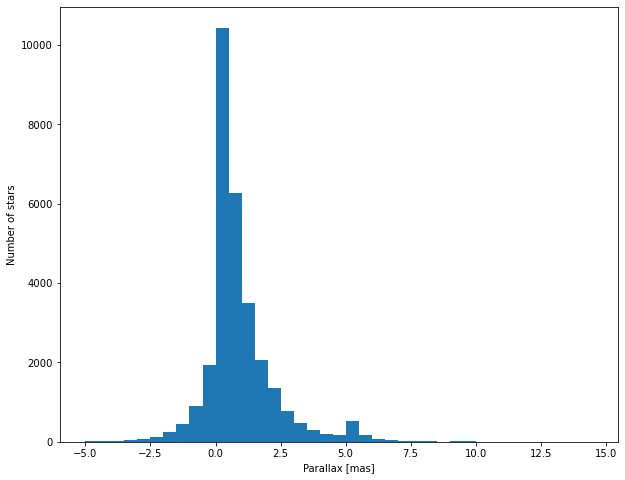

In [111]:
fig, ax = plt.subplots(ncols=1, figsize=(10,8))

ax.hist(data0['parallax'], bins=np.arange(-5, 15, 0.5))

ax.set_xlabel('Parallax [mas]')
ax.set_ylabel('Number of stars');

### ⛏ Exercise
Modify the line `ax.set_xlabel('Parallax [mas]')` to automatically find the units of the column being plotted. Do the same we did before when we defined the function `str_label()`.

In [119]:
# Plot the same histogram as before but starting with the generic variable col1. Do not use 'parallax' in any other part
col1 = 'parallax'

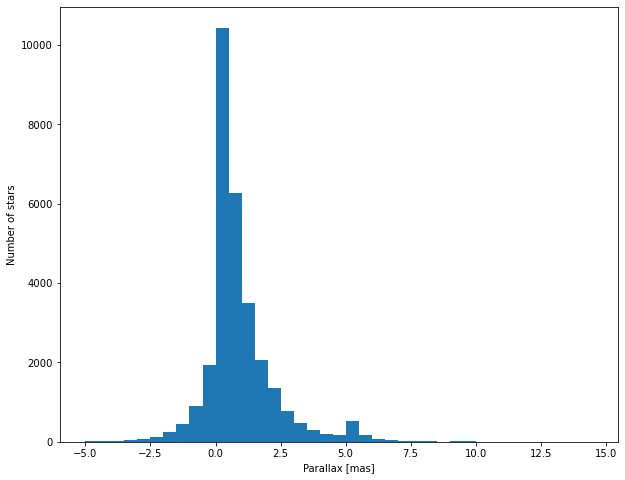

In [117]:
fig, ax = plt.subplots(ncols=1, figsize=(10,8))

ax.hist(data0[col1], bins=np.arange(-5, 15, 0.5))

description = data0[col1].info(out=None)['description']
unit = data0[col1].info(out=None)['unit']

ax.set_xlabel(f"{description} [{unit}]")
ax.set_ylabel('Number of stars');

### ✨ Exercise

First of all, we see that there are negative parallaxes, which don't have physical meaning, but are a consequence of errors in the parallax determination. We can create a second `Table` named `data1` that ignores any negative parallax. We will use this table from now on.

- Define the variable `positive_parallaxes` as those entries with parallax greater than 0. `data0['parallax'] > 0`. This is a boolean array saying, for each row, if that statement is True or False
- Now select slice the table `data0` by selecting the rows with `True` values: data0[positive_parallaxes]. Assign that new table to `data1`.
- Print the lenght of `data0` and `data1`. How many stars each one has? Use `len(data0)`, `len(data1)`


In [121]:
positive_parallaxes = data0['parallax'] > 0
data1 = data0[positive_parallaxes]
print(len(data0))
print(len(data1))

30330
21475


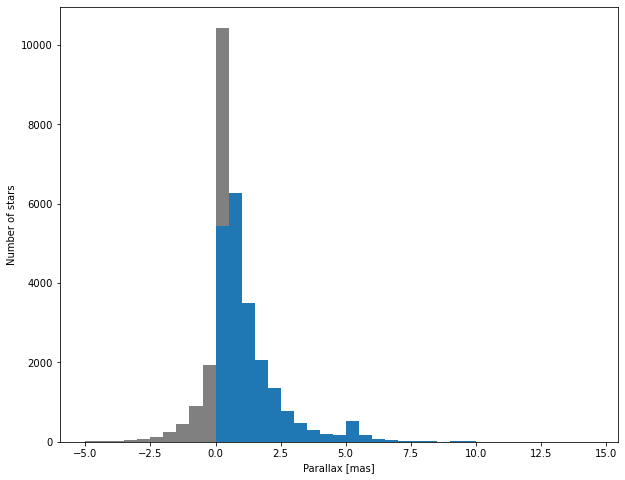

In [123]:
col1 = 'parallax'

fig, ax = plt.subplots(ncols=1, figsize=(10,8))

ax.hist(data0[col1], bins=np.arange(-5, 15, 0.5), color='grey')
ax.hist(data1[col1], bins=np.arange(-5, 15, 0.5))
    
description = data0[col1].info(out=None)['description']
unit = data0[col1].info(out=None)['unit']
ax.set_xlabel(f"{description} [{unit}]")
ax.set_ylabel('Number of stars');

## Equivalencies
Let's work with distances in kpc, that are more familiar to us. We will use an astropy unit transformation as before. However, an angle (mas) cannot be converted to distance (kpc) without knowing how the transformation should occur. We need to parse which equivalency to use to make the transormation.

There is a lot of information in section [Equivalencies](https://docs.astropy.org/en/stable/units/equivalencies.html), for example to convert spectral units (nm to Hz) or conversions from wavelength/frequency/energy including doppler effect.

In [255]:
data1['distance'] = data1['parallax'].to(u.kpc, equivalencies=u.parallax())
data1['distance'].description = 'Distance from Earth'
data1[0:3]

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg,cluster,distance
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,mag,,,kpc
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,float64,bool,float64
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784,8.218870196400683,8.218870196400683,False,1.2066695594466788
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.0160

### ⛏ Exercise
Compute yourself the distance in kpc and check that the transformation has worked. Start by using the numpy array without units `np.array(data1['parallax'])` and transform it with the parallax formula $d [{\rm kpc}]= \frac{1}{p[{\rm mas}]}$, where $p$ is the parallax. Compute the average of the residual `data1['distance'] - d_kpc`, where `d_kpc` is the manually computed distance in units of `kpc`.

In [256]:
# We compute the ditance as 1/parallax. When the parallax is in mas, the distance will be in kpc.
p = np.array(data1['parallax']) # Let's get rid of the units because we want to do the conversion manually
d = 1./p
d_kpc = u.Quantity(d, unit='kpc') # Now we set the correct units back
print(f"Astropy distances: {data1['distance'].data}")
print(f"My distances: {d_kpc}")

# We compute how different are the astropy parallax from equivalence and our manually computed distances:
residual = data1['distance'] - d_kpc
print(f"Mean residual {np.nanmean(residual)}")

Astropy distances: [1.20666956 2.33999627 0.64033658 ... 0.26994928 3.44074008 0.6831425 ]
My distances: [1.20666956 2.33999627 0.64033658 ... 0.26994928 3.44074008 0.6831425 ] kpc
Mean residual -3.4149148390706145e-16 kpc


### ✨ Exercise
Going back to the parallax distribution. Plot again the histogram of the `data[parallax]`, starting with `col1='parallax'`. Make the figure size slightly bigger, and use a smaller bin size. Try different `bins` selection either with `np.arange` (which fixes the step) or `np.linspace` (which fixes the number of steps) until you see some significant structure. Use the function `str_label()` we defined to label the X axis. Identify, approximately, the range of parallaxes that look interesting to you. (You can use `ax.set_xlim()` to tune the plot range).

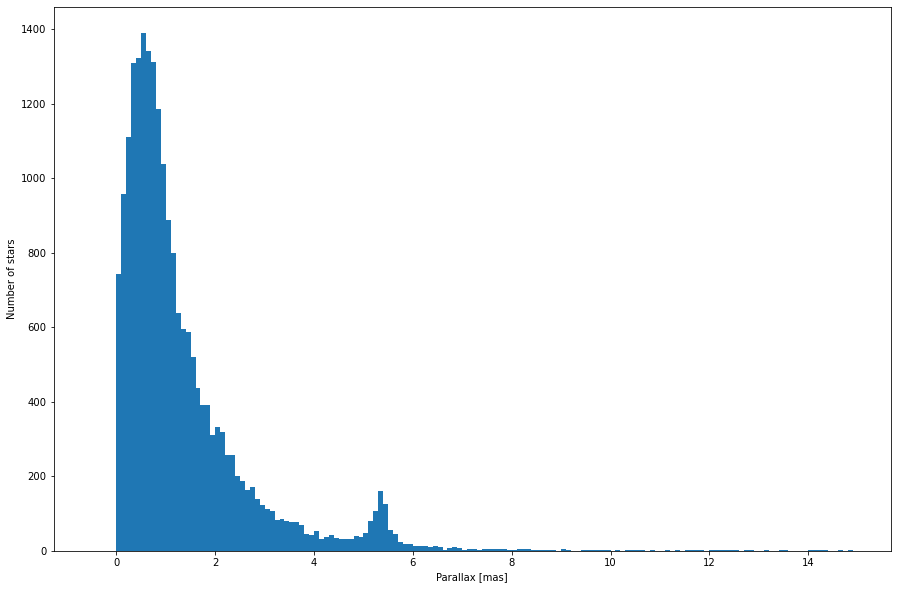

In [257]:
col1 = 'parallax'

fig, ax = plt.subplots(ncols=1, figsize=(15,10))

ax.hist(data1[col1], bins=np.arange(-0.5, 15, 0.1))

ax.set_xlabel(str_label(data0, col1))
ax.set_ylabel('Number of stars');

Now we are going to plot two panels to visualize the `parallax` and the `distance` at the same time.

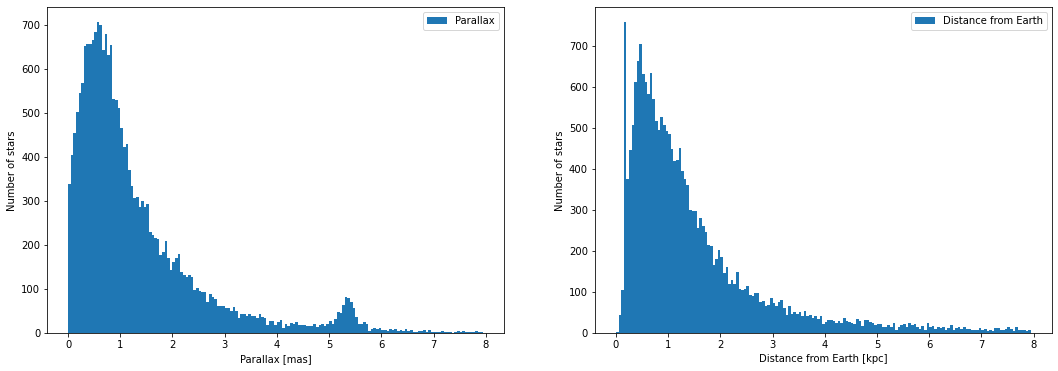

In [259]:
col1 = 'parallax'
col2 = 'distance'

fig, ax = plt.subplots(ncols=2, figsize=(18,6))

ax[0].hist(data1[col1], bins=np.arange(0, 8, 0.05), label=data1[col1].description)
ax[1].hist(data1[col2], bins=np.arange(0, 8, 0.05), label=data1[col2].description) # Try 0.01 kpc steps

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel(str_label(data1, col1))
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel(str_label(data1, col2))
ax[1].set_ylabel('Number of stars');

We see a very interesting accummulation of stars at a parallax of approximately 5.2 mas. We can create a filter to select the start in that particular range. We will overplot the distribution of the whole sample and the one of the selected group. Check how many stars we have selected with the filter.

In [260]:
manual_filter1 = (data1['parallax'] > 5.0*u.mas) & (data1['parallax'] < 5.7*u.mas)

cluster1 = data1[manual_filter1]
cluster1

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg,cluster,distance
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,mag,,,kpc
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,float64,bool,float64
0.02445630792133449,1635721458409799680,Gaia DR2 661324431287688448,661324431287688448,788166040,2015.5,130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,5.316194371046439,0.05892472792863759,90.22009,-35.60957552754509,0.08754513933765422,-11.963702152166118,0.055136721474611516,-0.41975328,-0.1358385,-0.22184417,0.4538053,-0.111287355,0.215826,-0.48650834,0.62542593,-0.25465265,-0.3871421,220,220,212,8,7.091365,386.3978,0.0,0.0,31,True,316.96573,1.5727062771431164,0.009477604151890891,-0.008497519,25,12,0.056965407,0,37,False,291,66232823.59961401,20482.763922214683,3233.5881,6.1356826,29,30612233.464896858,50147.45191680208,610.44446,6.6366506,29,49206886.48189549,95742.81356889517,513.9486,5.531855,1.2051294,0,1.1047955,0.500968,0.6038275,34.1410282196341,0.14830496348234412,13,5000.0,2.5,0.25,NOT_AVAILABLE,205.51166437920656,32.53709222672014,127.1971240804592,1.5873587768058746,100001,5047.947,4981.25,5098.27,--,--,--,--,--,--,200111,13.151215,12.892875,13.505751,101.17787,99.69645,102.659294,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661324431287688448,-0.2363131608235527,-0.2363131608235527,True,0.18810448418633724
0.02447974121342088,1635721458409

Instead of creating a new `Table`, theres is an alternative way to deal with this problem, and it is to create a new Boolean column with True/False that indicates if each star is part of the cluster or not.

In [261]:
data1['cluster'] = manual_filter1
data1[0:3]

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg,cluster,distance
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,mag,,,kpc
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,float64,bool,float64
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784,8.218870196400683,8.218870196400683,False,1.2066695594466788
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.0160

The cluster is simply selecting the rows matching the filter = selecting the true values. We could use `data1[manual_filter1]`, but we do not want to carry the filter around, it is better if the information is embedded in the table.

In [262]:
data1[data1['cluster']]  # This is exactly the same as cluster1

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg,cluster,distance
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,mag,,,kpc
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,float64,bool,float64
0.02445630792133449,1635721458409799680,Gaia DR2 661324431287688448,661324431287688448,788166040,2015.5,130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,5.316194371046439,0.05892472792863759,90.22009,-35.60957552754509,0.08754513933765422,-11.963702152166118,0.055136721474611516,-0.41975328,-0.1358385,-0.22184417,0.4538053,-0.111287355,0.215826,-0.48650834,0.62542593,-0.25465265,-0.3871421,220,220,212,8,7.091365,386.3978,0.0,0.0,31,True,316.96573,1.5727062771431164,0.009477604151890891,-0.008497519,25,12,0.056965407,0,37,False,291,66232823.59961401,20482.763922214683,3233.5881,6.1356826,29,30612233.464896858,50147.45191680208,610.44446,6.6366506,29,49206886.48189549,95742.81356889517,513.9486,5.531855,1.2051294,0,1.1047955,0.500968,0.6038275,34.1410282196341,0.14830496348234412,13,5000.0,2.5,0.25,NOT_AVAILABLE,205.51166437920656,32.53709222672014,127.1971240804592,1.5873587768058746,100001,5047.947,4981.25,5098.27,--,--,--,--,--,--,200111,13.151215,12.892875,13.505751,101.17787,99.69645,102.659294,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661324431287688448,-0.2363131608235527,-0.2363131608235527,True,0.18810448418633724
0.02447974121342088,1635721458409

### ✨ Exercise
- Use the last plot we did with the two pannels. Appart from the `data1`, plots, add now two new histograms in both panels `ax[0].hist(` and `ax[1].hist(` but plotting `cluster1`. You should see the two distributions overlapped.
- Set the labels to 'Full sample' and 'Cluster', respectively.
- Fine tune the data ranges as needed.
- What is the approximate distance of the selected cluster?

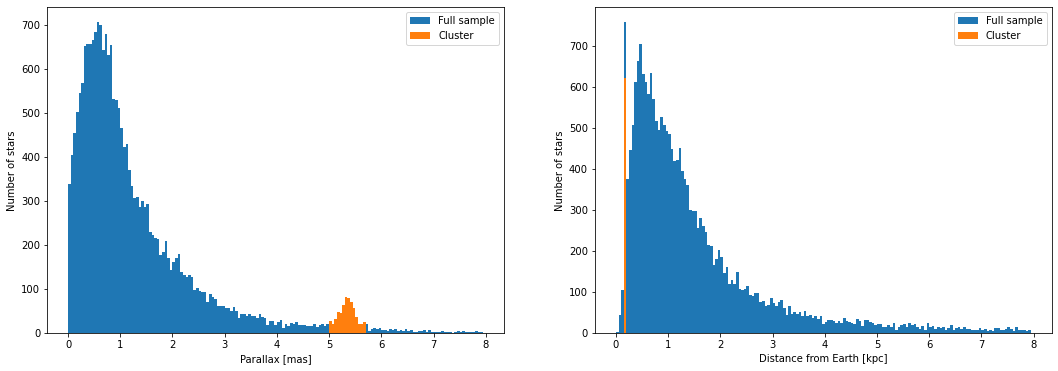

In [264]:
col1 = 'parallax'
col2 = 'distance'

fig, ax = plt.subplots(ncols=2, figsize=(18,6))

ax[0].hist(data1[col1], bins=np.arange(0, 8, 0.05), label='Full sample')
ax[1].hist(data1[col2], bins=np.arange(0, 8, 0.05), label='Full sample')

ax[0].hist(cluster1[col1], bins=np.arange(0, 8, 0.05), label='Cluster')
ax[1].hist(cluster1[col2], bins=np.arange(0, 8, 0.05), label='Cluster')

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel(str_label(data1, col1))
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel(str_label(data1, col2))
ax[1].set_ylabel('Number of stars');

### ✨ Exercise

Manually produce the `phot_g_mean_mag` vs `parallax_error` we did, but including data from the two tables: `data1` in black and `cluster1` in red.

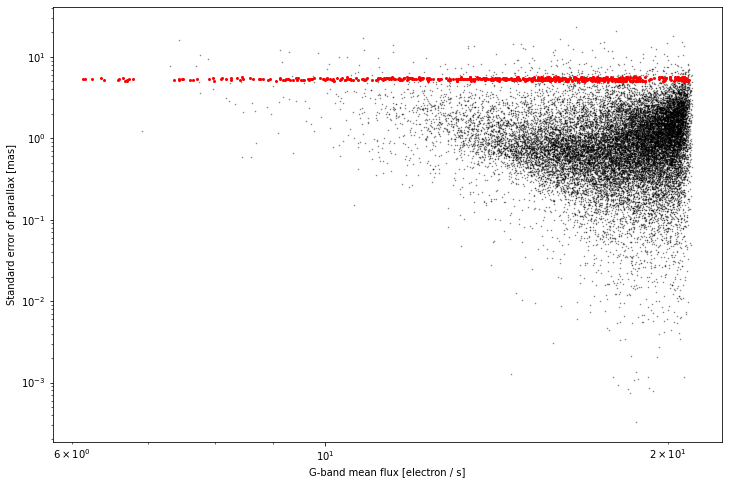

In [265]:
col1 = 'phot_g_mean_flux'
col2 = 'parallax_error'

fig, ax = plt.subplots(ncols=1, figsize=(12,8))

ax.plot(data1['phot_g_mean_mag'], data1['parallax'],'.k', ms=1, alpha=0.5)
ax.plot(cluster1['phot_g_mean_mag'], cluster1['parallax'], marker='o', color='r', ms=2, ls='')

ax.loglog()

ax.set_xlabel(str_label(data0, col1))
ax.set_ylabel(str_label(data0, col2));

We see that the cluster is dominated by bright stars (lower magnitude), and form a sharp cluster in parallax/distance, as we already knew.

## Spatial distribution of the cluster
We plot the distribution of start in the sky. First, all the stars in the sample are plotted in grey. The stars of the cluster and plotted in color, with the colorscale representing the distance from the Earth in pc.

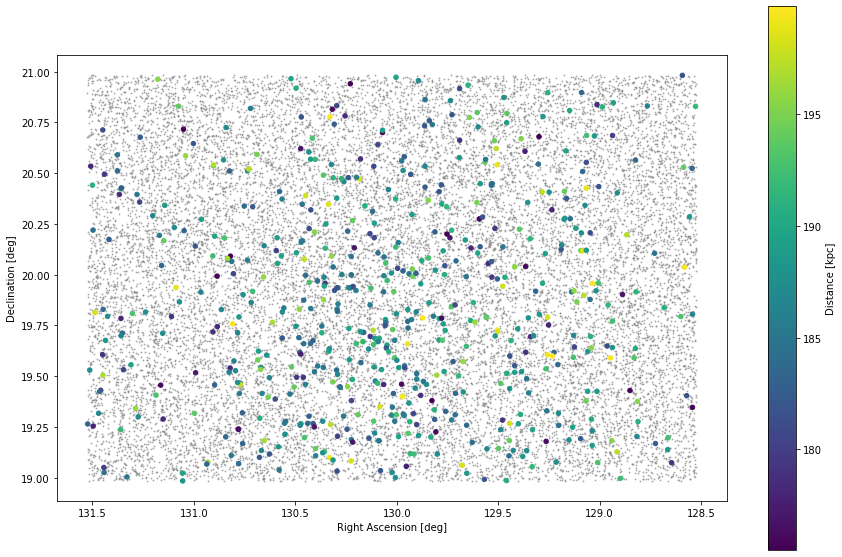

In [266]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.set_aspect('equal')

ax.scatter(data1['ra'], data1['dec'], c='gray', s=1, alpha=0.5);
l = ax.scatter(cluster1['ra'], cluster1['dec'], c=cluster1['distance']*1000., s=20);

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

# Show the color bar
cb = fig.colorbar(l);
cb.set_label('Distance [kpc]')

### 🌪 Exercise
Repeat the previous plot by making it more general, using generic columns `col1`, `col2`, `col3`. Do it also with the later plots

Let's include the photometry information and use a different color for the `cluster1` stars.

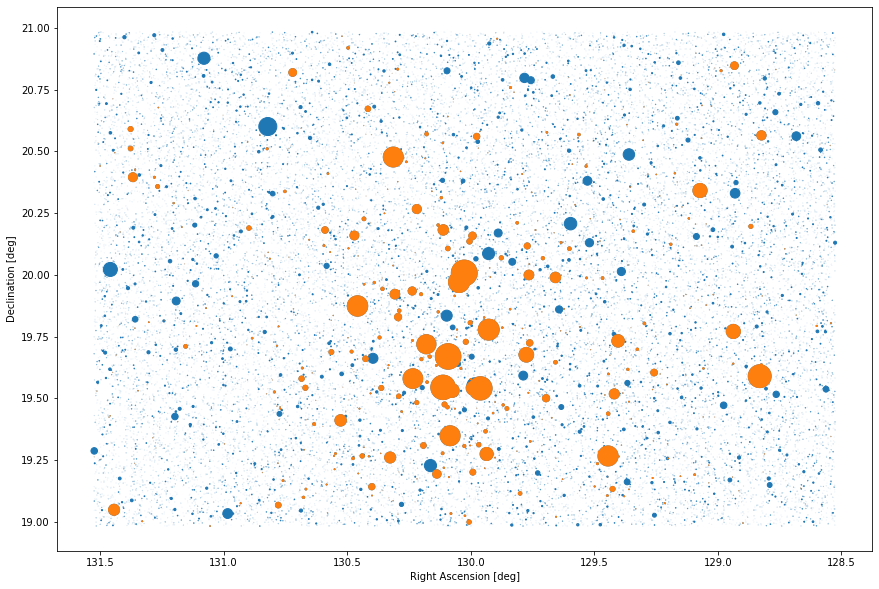

In [267]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.scatter(data0['ra'], data0['dec'], s=data0['phot_g_mean_flux']/1e5);
ax.scatter(cluster1['ra'], cluster1['dec'], s=cluster1['phot_g_mean_flux']/1e5);

ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

There is no apparent pattern of the selected stars, although there seems to be an overdensity at the center, specially in Right Ascension.

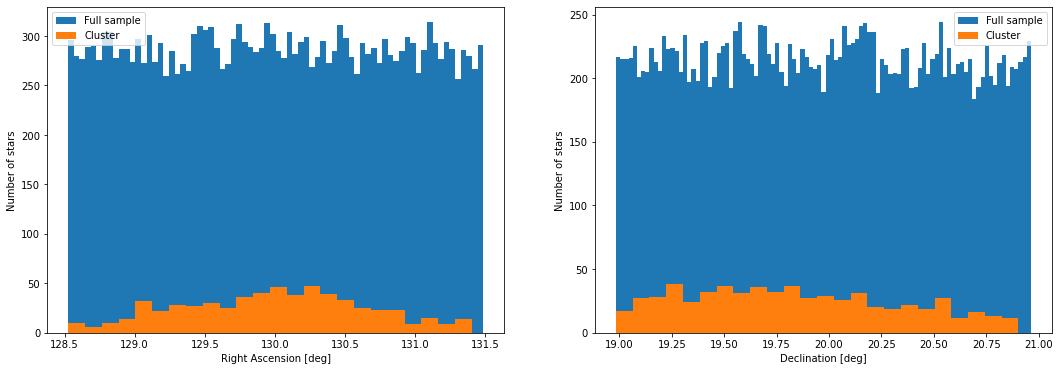

In [268]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

ra_range = [np.min(data1['ra']), np.max(data1['ra'])]
de_range = [np.min(data1['dec']), np.max(data1['dec'])]
                   
                                       
ax[0].hist(data1['ra'],    bins=np.arange(ra_range[0], ra_range[1], 0.04), label='Full sample')
ax[0].hist(cluster1['ra'], bins=np.arange(ra_range[0], ra_range[1], 0.12), label='Cluster')

ax[1].hist(data1['dec'],    bins=np.arange(de_range[0], de_range[1], 0.02), label='Full sample')
ax[1].hist(cluster1['dec'], bins=np.arange(de_range[0], de_range[1], 0.08), label='Cluster')

ax[0].set_xlabel('Right Ascension [deg]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Declination [deg]')
ax[1].set_ylabel('Number of stars');

ax[0].legend()
ax[1].legend();

Nothing obvious or much interesting. The overdensity in the centre for R.A. is clear, but in Dec it is not clear, there may be a slope.

### ✨ Exercise
Let's save the data sets for future use. Like in session 1, we will save them with `format='ascii.ecsv'`
- Use method `data1.write()` to save the table in file `'../data/data1.ecsv'` with the correct format.
- Use method `cluster1.write()` to save the table in file `'../data/cluster1.ecsv'` with the correct format.

In [ ]:
data1.write('../data/data1.ecsv', format='ascii.ecsv', overwrite=True)
cluster1.write('../data/cluster1.ecsv', format='ascii.ecsv', overwrite=True)

# Pandas tables

In [ ]:
import pandas as pd

In [ ]:
df1 = data1.to_pandas()
df1

In [164]:
df1.head()

,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg,cluster
0,0.009802,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.015005,0.248881,19.980541,0.193851,...,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,8.218870,8.218870,False
1,0.013414,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.016021,0.105317,19.993747,0.068837,...,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,5.415092,5.415092,False
2,0.017763,1635721458409799680,Gaia DR2 661322129182111232,661322129182111232,1348785594,2015.5,130.039527,0.494142,19.971954,0.369152,...,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,10.688429,10.688429,False
3,0.018220,1635721458409799680,Gaia DR2 661322090528141568,661322090528141568,1417274752,2015.5,130.021480,0.255773,19.965408,0.176424,...,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,7.599925,7.599925,False
4,0.023270,1635721458409799680,Gaia DR2 661323606650853632,661323606650853632,1478051041,2015.5,130.049762,0.399135,19.983778,0.288447,...,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,7.779511,7.779511,False


The first thing we see is that we have lost the unit information. That is an important problem if we don't track the column operations properly.

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21475 entries, 0 to 21474
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dist                              21475 non-null  float64
 1   solution_id                       21475 non-null  int64  
 2   DESIGNATION                       21475 non-null  object 
 3   source_id                         21475 non-null  int64  
 4   random_index                      21475 non-null  int64  
 5   ref_epoch                         21475 non-null  float64
 6   ra                                21475 non-null  float64
 7   ra_error                          21475 non-null  float64
 8   dec                               21475 non-null  float64
 9   dec_error                         21475 non-null  float64
 10  parallax                          21475 non-null  float64
 11  parallax_error                    21475 non-null  float64
 12  para

In [166]:
df1.columns

Index(['dist', 'solution_id', 'DESIGNATION', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_objec

In [167]:
df1['ra']
df1[['ra','dec']]

,ra,dec
0,130.015005,19.980541
1,130.016021,19.993747
2,130.039527,19.971954
3,130.021480,19.965408
4,130.049762,19.983778
...,...,...
21470,131.522058,20.960466
21471,128.533398,19.007587
21472,128.535230,20.978715
21473,128.528345,19.003505


In [168]:
df1['pmra'].values

array([-4.03323157, -2.60482938, -1.74530183, ...,  4.7305853 ,
       -1.48784179, 14.64033053])

Slicing

To slice by index value:

In [170]:
df1.loc[3]

dist                                                              0.01822
solution_id                                           1635721458409799680
DESIGNATION                                   Gaia DR2 661322090528141568
source_id                                              661322090528141568
random_index                                                   1417274752
                                              ...                        
lum_percentile_upper                                                  NaN
datalink_url            https://gea.esac.esa.int/data-server/datalink/...
Mg2                                                              7.599925
Mg                                                               7.599925
cluster                                                             False
Name: 3, Length: 99, dtype: object

To slice by index number:

In [172]:
df1.iloc[3]

dist                                                              0.01822
solution_id                                           1635721458409799680
DESIGNATION                                   Gaia DR2 661322090528141568
source_id                                              661322090528141568
random_index                                                   1417274752
                                              ...                        
lum_percentile_upper                                                  NaN
datalink_url            https://gea.esac.esa.int/data-server/datalink/...
Mg2                                                              7.599925
Mg                                                               7.599925
cluster                                                             False
Name: 3, Length: 99, dtype: object

Can be combined with slices in one or several columns.

In [171]:
df1['pmra'].iloc[3]

-3.942520628852158

In [173]:
df1.iloc[5:8]

,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg,cluster
5,0.024456,1635721458409799680,Gaia DR2 661324431287688448,661324431287688448,788166040,2015.5,130.026579,0.043559,20.007736,0.031000,...,13.151215,12.892875,13.505751,101.177872,99.696449,102.659294,https://gea.esac.esa.int/data-server/datalink/...,-0.236313,-0.236313,True
6,0.024480,1635721458409799680,Gaia DR2 661322060465742336,661322060465742336,1182878022,2015.5,130.047558,0.050872,19.971076,0.036801,...,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,0.164561,0.164561,True
7,0.026371,1635721458409799680,Gaia DR2 661323641013705472,661323641013705472,944638641,2015.5,130.050948,0.031404,19.993379,0.024089,...,1.086360,0.848788,1.241132,1.269504,1.126871,1.412137,https://gea.esac.esa.int/data-server/datalink/...,4.414471,4.414471,False


In [174]:
df1[['pmra','pmdec']].iloc[6]

pmra    -35.311819
pmdec   -13.595468
Name: 6, dtype: float64

In [175]:
df1[['pmra','pmdec']].iloc[6:10]

,pmra,pmdec
6,-35.311819,-13.595468
7,-10.744407,2.047604
8,0.351832,-3.074081
9,-0.467888,-0.270136


We can easily do operations to columns. First by aggregating values according to some functions

In [176]:
df1.aggregate(['sum', 'min'])

,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,Mg2,Mg,cluster
sum,19843.797827,4517603007461851136,Gaia DR2 661322846442390784Gaia DR2 6613229538...,6120742208307241728,18195852353695,43282862.5,2.792198e+06,8024.371191,429010.505126,4921.175491,...,6035.442383,5533.554688,6427.920410,17878.617188,15619.746094,20137.488281,https://gea.esac.esa.int/data-server/datalink/...,162811.865479,162811.865479,621
min,0.009802,1635721458409799680,Gaia DR2 659698146213460864,659698146213460864,19969,2015.5,1.285250e+02,0.018194,18.983352,0.011679,...,0.500969,0.313949,0.513331,0.030905,0.030151,0.031660,https://gea.esac.esa.int/data-server/datalink/...,-9.922901,-9.922901,False


In [177]:
df1.aggregate({'ra' : ['mean', 'min', 'max', 'std'],
               'dec' : ['mean', 'min', 'max', 'std'],
               'parallax': 'std'})

,ra,dec,parallax
mean,130.020884,19.977206,NaN
min,128.525007,18.983352,NaN
max,131.524907,20.983283,NaN
std,0.862860,0.574344,1.419173


In [178]:
df1.describe()

,dist,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,Mg2,Mg
count,21475.000000,2.147500e+04,2.147500e+04,2.147500e+04,21475.0,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,...,5053.000000,4318.0,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,21475.000000,21475.000000
mean,0.924042,1.635721e+18,6.625639e+17,8.473040e+08,2015.5,130.020884,0.373661,19.977206,0.229158,1.352400,...,0.263006,200111.0,1.397737,1.281508,1.488632,4.140487,3.617354,4.663610,7.581461,7.581461
std,0.365510,0.000000e+00,1.564897e+15,4.905625e+08,0.0,0.862860,0.398041,0.574344,0.241998,1.419173,...,0.213469,0.0,3.233030,2.986711,3.329458,44.876495,40.223816,49.658020,3.044657,3.044657
min,0.009802,1.635721e+18,6.596981e+17,1.996900e+04,2015.5,128.525007,0.018194,18.983352,0.011679,0.000325,...,0.007100,200111.0,0.500969,0.313949,0.513331,0.030905,0.030151,0.031660,-9.922901,-9.922901
25%,0.655339,1.635721e+18,6.612660e+17,4.192382e+08,2015.5,129.277745,0.084699,19.484359,0.053048,0.495220,...,0.107100,200111.0,0.720208,0.648146,0.763561,0.256345,0.214092,0.296318,5.367145,5.367145
50%,0.947552,1.635721e+18,6.618318e+17,8.447739e+08,2015.5,130.017273,0.222229,19.980902,0.137585,0.905909,...,0.200700,200111.0,0.937876,0.855817,1.002790,0.667259,0.584672,0.758724,7.667940,7.667940
75%,1.209653,1.635721e+18,6.643890e+17,1.277870e+09,2015.5,130.769064,0.534045,20.471576,0.329299,1.683563,...,0.351800,200111.0,1.269365,1.156431,1.379006,1.830126,1.586210,2.058991,9.936427,9.936427
max,1.724373,1.635721e+18,6.648629e+17,1.692899e+09,2015.5,131.524907,3.238878,20.983283,2.461208,23.376402,...,1.553000,200111.0,150.389877,136.227798,151.835205,2420.168213,2245.128906,2595.207520,16.517622,16.517622


In [179]:
def my_func(row):
    return np.sqrt(row['pmra']**2 + row['pmdec']**2)

df1.apply(lambda row: my_func(row), axis=1)

0         4.976782
1         3.819113
2         6.473050
3         5.183002
4         4.453820
           ...    
21470     3.903989
21471    12.139889
21472     4.747764
21473     2.679700
21474    24.481405
Length: 21475, dtype: float64

Other cases
- pivot tables
- very powerful groupby
- Complex conditions involving multiple columns

NaN values

In [182]:
df1['radial_velocity'].isna().sum()

20894

In [214]:
df_rv = df1[['radial_velocity', 'parallax']].dropna()
df_rv

,radial_velocity,parallax
5,34.141028,5.316194
17,37.406026,5.351793
33,39.616677,5.540973
41,24.315143,3.151571
52,11.670341,2.522042
...,...,...
21037,-36.414927,3.174593
21071,-12.252098,2.790552
21156,30.487645,0.139273
21261,-10.466981,3.796703


Groupby

In [189]:
df1.groupby('cluster').aggregate('mean')

,dist,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,Mg2,Mg
cluster,,,,,,,,,,,,,,,,,,,,,
False,0.928825,1.635721e+18,6.625708e+17,8.479414e+08,2015.5,130.020444,0.379087,19.980880,0.232491,1.233506,...,0.256108,200111.0,1.409328,1.291462,1.502119,4.134910,3.581961,4.687859,7.551316,7.551316
True,0.763428,1.635721e+18,6.623327e+17,8.258981e+08,2015.5,130.035662,0.191458,19.853845,0.117252,5.345038,...,0.358928,200111.0,1.229338,1.136858,1.292657,4.221515,4.131737,4.311292,8.593759,8.593759


In [191]:
cluster1['matched_observations'].description

'Amount of observations matched to this source'

In [190]:
df1['matched_observations'].describe()

count    21475.000000
mean        34.451967
std         11.036413
min          7.000000
25%         25.000000
50%         30.000000
75%         44.000000
max         71.000000
Name: matched_observations, dtype: float64

Let's make many groups according to how many observations a star has.

In [193]:
df1.groupby('matched_observations').aggregate(['mean','min'])[['parallax_error','ra_error', 'dec_error']]

/tmp/ipykernel_3758/1839178531.py:1: FutureWarning: ['DESIGNATION', 'phot_variable_flag', 'datalink_url'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1.groupby('matched_observations').aggregate(['mean','min'])[['parallax_error','ra_error', 'dec_error']]


parallax_error            ra_error           dec_error  \
                               mean       min      mean       min      mean   
matched_observations                                                          
7                          0.483023  0.483023  0.348677  0.348677  0.236141   
9                          3.474166  3.474166  3.033284  3.033284  2.461208   
10                         1.775294  0.826355  1.710588  0.545412  1.381276   
11                         2.291366  1.764382  2.038002  1.650193  1.381581   
12                         1.864941  0.444866  1.723895  0.491712  1.014483   
13                         1.965943  0.153533  1.639054  0.124733  1.040871   
14                         2.077664  0.898348  1.762437  0.863725  1.097479   
15                         1.859469  0.147059  1.495720  0.134485  0.856612   
16                         1.752165  0.283756  1.489185  0.152858  0.861236   
17                         1.507268  0.135424  1.217878  0.109847  0.732941   
18                         1.446958  0.090879  1.122077  0.062375  0.686481   
19                         1.235868  0.072166  0.941857  0.053464  0.572171   
20                         1.097398  0.080058  0.825785  0.052849  0.498155   
21                         0.881177  0.057199  0.646202  0.046415  0.402390   
22                         0.767441  0.036479  0.562563  0.031819  0.350910   
23                         0.654492  0.041378  0.484920  0.028982  0.308495   
24                         0.552759  0.034168  0.411141  0.025505  0.261972   
25                         0.449736  0.035610  0.327910  0.025741  0.210905   
26                         0.407118  0.030855  0.301322  0.024024  0.192546   
27                         0.384327  0.029312  0.286344  0.022980  0.180092   
28                         0.328453  0.030438  0.244678  0.023771  0.152367   
29                         0.344292  0.031538  0.260591  0.023332  0.163191   
30                         0.331495  0.027252  0.256354  0.022570  0.156695   
31                         0.398470  0.026037  0.313053  0.021716  0.187580   
32                         0.415640  0.026062  0.330393  0.021588  0.195929   
33                         0.541997  0.026292  0.434788  0.023052  0.254183   
34                         0.495112  0.028135  0.398580  0.022408  0.236619   
35                         0.555895  0.027897  0.459911  0.022345  0.276468   
36                         0.606811  0.030889  0.508759  0.022542  0.297621   
37                         0.628287  0.027542  0.515659  0.021132  0.300962   
38                         0.653201  0.029996  0.536008  0.023699  0.316445   
39                         0.530586  0.026712  0.439911  0.020947  0.263269   
40                         0.500863  0.027362  0.405361  0.022107  0.244150   
41                         0.446380  0.024909  0.369092  0.021947  0.224849   
42                         0.437157  0.024315  0.363156  0.020841  0.223126   
43                         0.378238  0.024484  0.312259  0.020722  0.189500   
44                         0.358147  0.021905  0.296264  0.018194  0.178806   
45                         0.363228  0.022641  0.305970  0.019112  0.185732   
46                         0.353340  0.023088  0.294736  0.019133  0.175393   
47                         0.328523  0.023278  0.272560  0.020687  0.162487   
48                         0.328287  0.021762  0.270313  0.018272  0.159611   
49                         0.350291  0.024726  0.289200  0.021589  0.170752   
50                         0.330693  0.024585  0.272926  0.020260  0.162353   
51                         0.409863  0.022340  0.344937  0.018868  0.201499   
52                         0.383146  0.024461  0.324147  0.021482  0.191918   
53                         0.327832  0.023406  0.272847  0.021673  0.159605   
54                         0.310621  0.023227  0.257276  0.019076  0.149117   
55                         0.300870  0.023576  0.252958  0.020446  0.14

/tmp/ipykernel_3758/3019065060.py:1: FutureWarning: ['DESIGNATION', 'phot_variable_flag', 'datalink_url'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1.groupby('matched_observations').aggregate(['mean','min'])[['parallax_error']].plot()


<AxesSubplot:xlabel='matched_observations'>

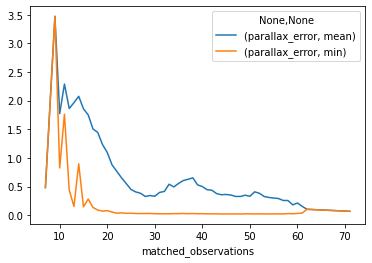

In [196]:
df1.groupby('matched_observations').aggregate(['mean','min'])[['parallax_error']].plot()

Working with datetime series

In [211]:
N = 100
times = pd.date_range("2021-06-9", periods=N, freq='D')

ts = pd.DataFrame({'v1': np.random.normal(0.5,100,N) + 0.1*np.arange(N)**2,
                   'v2': np.random.normal(0.5,100,N) - 0.1*np.arange(N)**2},
                   index=times)
ts

,v1,v2
2021-06-09,8.144366,35.048401
2021-06-10,-86.144563,-156.013818
2021-06-11,-54.038581,-207.385772
2021-06-12,47.343217,212.000430
2021-06-13,17.922249,114.847983
...,...,...
2021-09-12,872.031836,-750.423554
2021-09-13,935.899747,-892.232069
2021-09-14,962.258418,-776.919872
2021-09-15,1109.508108,-958.570713


<AxesSubplot:>

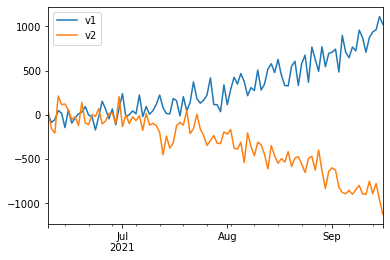

In [212]:
ts.plot();

Other plots

[]

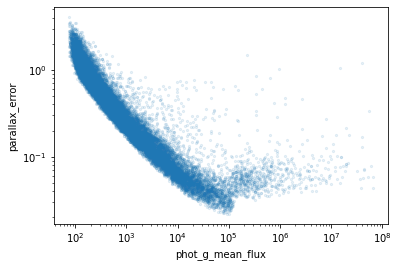

In [215]:
df1.plot.scatter(x='phot_g_mean_flux', y='parallax_error', marker='.', alpha=0.1)
plt.loglog();

[]

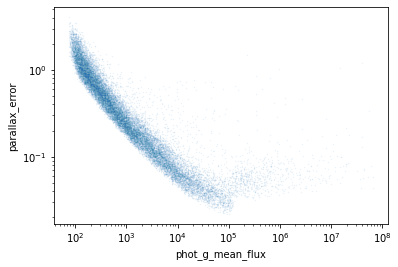

In [216]:
df1.plot.scatter(x='phot_g_mean_flux', y='parallax_error',  marker='.', s=0.5, alpha=0.1)
plt.loglog();

[]

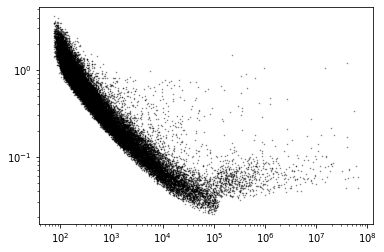

In [219]:
plt.plot(data0['phot_g_mean_flux'], data0['parallax_error'], '.k', ms=1, alpha=0.5)
plt.loglog();

<AxesSubplot:ylabel='Frequency'>

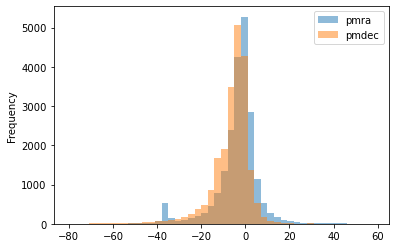

In [220]:
df1[['pmra','pmdec']].plot.hist(bins=np.arange(-80, 60, 3), alpha=0.5);

<AxesSubplot:>

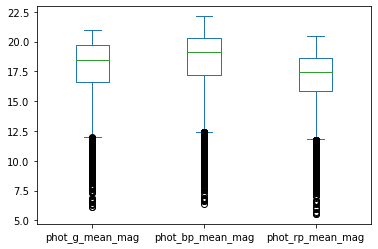

In [221]:
df1[['phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag']].plot.box();

<AxesSubplot:ylabel='Frequency'>

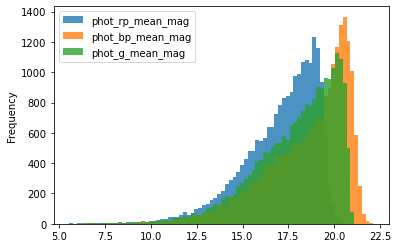

In [234]:
df1[['phot_rp_mean_mag', 'phot_bp_mean_mag', 'phot_g_mean_mag']].plot.hist(bins = 80, alpha=0.8);

<AxesSubplot:xlabel='ra', ylabel='dec'>

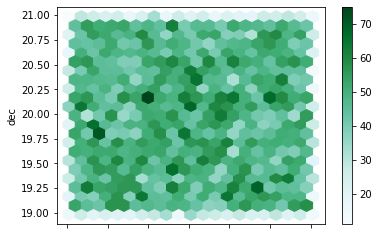

In [250]:
df1.plot.hexbin(x='ra', y='dec', gridsize=20);

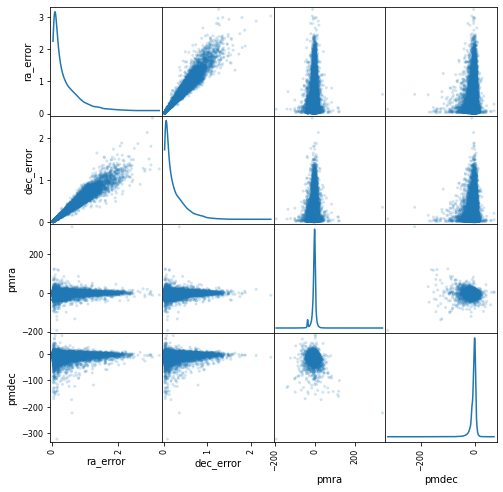

In [254]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1[['ra_error','dec_error','pmra','pmdec']], alpha=0.2, diagonal='kde', figsize=(8,8));

Many more examples here: https://pandas.pydata.org/docs/user_guide/visualization.html